In [40]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
import data_visualization as viz
import generator as gen
import importlib as imp

In [41]:
imp.reload(viz)
imp.reload(gen)

<module 'generator' from '/Users/remilepriol/Dropbox/intership2017/code/generator.py'>

# Simple 2D example

In [42]:
n = 2000
sig1 = np.array([[.1,0],
                 [0,.01]])
mu1 = np.array([0,2])
sig2 = np.array([[.1,0],
                 [0,1]])
mu2 = np.array([0,0])

In [43]:
x = np.zeros([4*n,2])
# training set
x[:n] = np.dot(np.random.randn(n,2),sig1)+mu1
x[n:2*n] = np.dot(np.random.randn(n,2),sig2)+mu2
# test set
x[2*n:3*n] = np.dot(np.random.randn(n,2),sig1)+mu1
x[3*n:] = np.dot(np.random.randn(n,2),sig2)+mu2
x = gen.standardize(x)
xtrain = x[:2*n]
xtest = x[2*n:]
y = np.ones(2*n).astype(int)
y[:n]=0

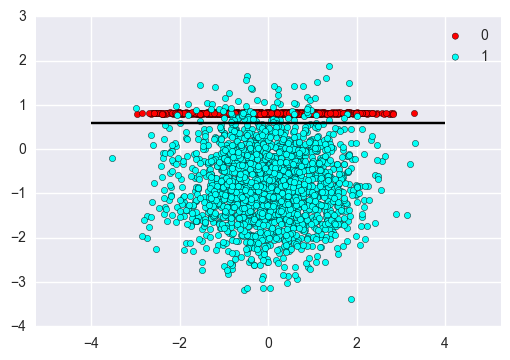

In [44]:
viz.plot_data(xtrain,y,alpha=1)
plt.hlines(.6,-4,4)

In [45]:
import sklearn.linear_model
import sklearn

In [46]:
logreg = sklearn.linear_model.LogisticRegression(C=1,fit_intercept=True,intercept_scaling=1)

In [47]:
logreg.fit(xtrain,y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
logreg.coef_

array([[-0.07341833, -7.77170176]])

In [49]:
np.append(logreg.coef_,logreg.intercept_)

array([-0.07341833, -7.77170176,  3.66302724])

In [50]:
imp.reload(viz)

<module 'data_visualization' from '/Users/remilepriol/Dropbox/intership2017/code/data_visualization.py'>

0.0001 b 	 [  4.24596904e-10   2.56258164e-08] 	 0.921
1.0001 r 	 [ 0.0045055   0.52324173] 	 0.972
10000.0 g 	 [ 0.00450356  0.52354698] 	 0.972


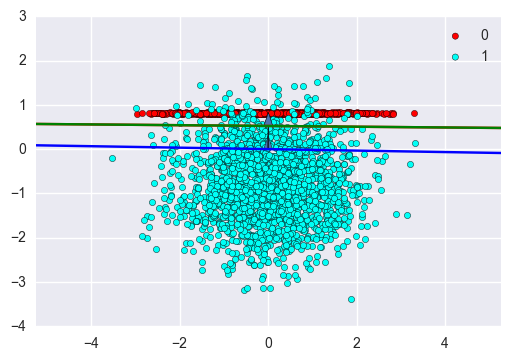

In [51]:
logreg.C = 100
viz.plot_data(xtrain,y)
for scaling,style in zip([1e-4,1.0001,1e4],['b','r','g']):
    logreg.intercept_scaling=scaling
    logreg.fit(xtrain,y)
    disc = viz.discriminator(np.append(logreg.coef_,logreg.intercept_))
    plt.plot(disc[:,0],disc[:,1],style)
    arrow = -logreg.intercept_[0]*logreg.coef_[0]/np.sum(logreg.coef_**2)
    print(scaling,style,"\t",arrow,"\t",logreg.score(xtest,y))
    plt.arrow(0,0,arrow[0],arrow[1],hold=True,width=0.01)


For 2 classes, in 2D with standardization, the intercept scaling coefficient does not matter too much. All the models with a scaling coefficient between 1 and 10,000 get the same decision boundaries. The boundary is also relatively agnostic to $C=\frac{1}{\lambda}$. Except for C very small (strong regularization), the boundary does not move.

# Example with many gaussians

This time we can do 2D to plot the areas and play with the number of dimensions more when looking at the test error. 

First only look at the test error. Setting : 2 class versus 100 classes. 

In [23]:
imp.reload(gen)

<module 'generator' from '/Users/remilepriol/Dropbox/intership2017/code/generator.py'>

In [24]:
n,d,k = 10000,20,100
x,y,mu,sig,xtest,ytest = gen.gengaussianmixture(n,d,k,scale=.1,gentest=True,randomcov=True,uniform=False)

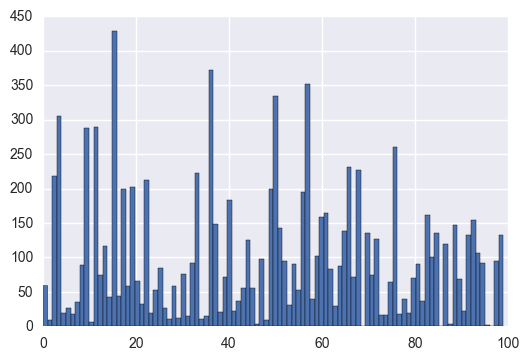

In [29]:
plt.hist(y,bins=k)
pass

In [25]:
logreg = sklearn.linear_model.LogisticRegression(C=1,fit_intercept=True,intercept_scaling=1)

In [26]:
# before standardization
for scaling in [1e-4,1.,1e4]:
    logreg.intercept_scaling = scaling
    logreg.fit(x,y)
    print("bias factor : %f \t train score : %f \t test score : %f"%
          (scaling,logreg.score(x,y), logreg.score(xtest,ytest)))

bias factor : 0.000100 	 train score : 0.331100 	 test score : 0.324000
bias factor : 1.000000 	 train score : 0.388000 	 test score : 0.368500
bias factor : 10000.000000 	 train score : 0.394100 	 test score : 0.372400


In [30]:
# standardization
xmean = (np.mean(x,axis=0)+np.mean(xtest,axis=0))/2
xstandard = x - xmean
xstandardtest = xtest - xmean
xstd = np.sqrt((np.var(xstandard,axis=0) + np.var(xstandardtest,axis=0))/2)
xstandard /= xstd
xstandardtest /= xstd

In [31]:
# after standardization
for scaling in [1e-4,1.,1e4]:
    logreg.intercept_scaling = scaling
    logreg.fit(xstandard,y)
    print("bias factor : %f \t train score : %f \t test score : %f"%
          (scaling,logreg.score(xstandard,y), logreg.score(xstandardtest,ytest)))

bias factor : 0.000100 	 train score : 0.297200 	 test score : 0.293100
bias factor : 1.000000 	 train score : 0.390500 	 test score : 0.371400
bias factor : 10000.000000 	 train score : 0.393300 	 test score : 0.368700


In [35]:
# With only 2 classes
k = 2
x,y,mu,sig,xtest,ytest = gen.gengaussianmixture(n,d,k,randomcov=True,scale=.5,gentest=True,uniform=False)

In [36]:
# before standardization
for scaling in [1e-4,1.,1e4]:
    logreg.intercept_scaling = scaling
    logreg.fit(x,y)
    print("bias factor : %f \t train score : %f \t test score : %f"%(scaling,logreg.score(x,y), logreg.score(xtest,ytest)))

bias factor : 0.000100 	 train score : 0.837900 	 test score : 0.838300
bias factor : 1.000000 	 train score : 0.841500 	 test score : 0.840700
bias factor : 10000.000000 	 train score : 0.840300 	 test score : 0.841400


In [37]:
# standardization
xmean = (np.mean(x,axis=0)+np.mean(xtest,axis=0))/2
xstandard = x - xmean
xstandardtest = xtest - xmean
xstd = np.sqrt((np.var(xstandard,axis=0) + np.var(xstandardtest,axis=0))/2)
xstandard /= xstd
xstandardtest /= xstd

In [38]:
# after standardization
for scaling in [1e-4,1.,1e4]:
    logreg.intercept_scaling = scaling
    logreg.fit(xstandard,y)
    print("bias factor : %f \t train score : %f \t test score : %f"%
          (scaling,logreg.score(xstandard,y), logreg.score(xstandardtest,ytest)))

bias factor : 0.000100 	 train score : 0.701200 	 test score : 0.694700
bias factor : 1.000000 	 train score : 0.841600 	 test score : 0.840600
bias factor : 10000.000000 	 train score : 0.837900 	 test score : 0.837700


# Moralité : jamais de vraie différence entre une régularisation neutre ou faible sur le biais. Seule une régularisation forte chamboule tout.

In [4]:
import cython_code.primes as primes

In [5]:
print(primes.primes(100))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541]


In [8]:
import cython_code.helloworld